In [67]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('amazon-reviews.csv')
data.head()
print(type(data))
df = pd.DataFrame(data, columns = ['reviewerID', 'asin', 'Title', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])
df_s = df.head(51)

df_s.head()

<class 'pandas.core.frame.DataFrame'>


,reviewerID,asin,Title,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A15Q7ABIU9O9YZ,60554800,Red Tide,Larry Scantlebury,"[2,3]",This is my first GM Ford book and I will read ...,3,"Let's keep it real, not personal",1127606400,"09 25, 2005"
1,AUIJDXNYVTEA8,60554800,Red Tide,Les Stockton,"[0,2]",I liked the story. I thought the book added a...,4,I liked it,1361923200,"02 27, 2013"
2,A20N5GOON55TE9,60554800,Red Tide,lila,"[0,2]","As always, G.M. Ford does not disappoint. I st...",5,Good reading,1366761600,"04 24, 2013"
3,A1CT8ENDZSYTX3,60554800,Red Tide,Lisa B.,"[1,2]",I love Ford's Leo Waterman series and the firs...,3,Science Fiction or Mystery?,1122249600,"07 25, 2005"
4,A2SI6BNK5SWSMD,60554800,Red Tide,L. J. Roberts,"[2,2]",It was nice to see Corso working with the poli...,3,3.5 stars - Needed a better end.,1113004800,"04 9, 2005"


In [69]:
SG = nx.Graph()

for i in range(len(df_s)-1):
    for j in range(len(df_s)-1):
        if i!=j and df_s['Title'][i] == df_s['Title'][j]:
            SG.add_edge(i,j)
            

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 446
Average degree:  17.8400


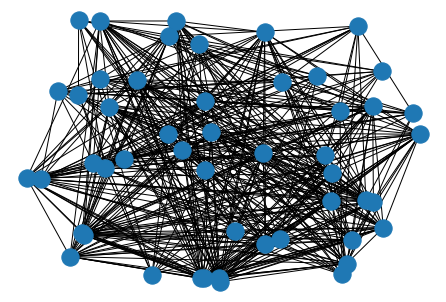

In [70]:
nx.draw_random(SG)
plt.savefig("small_network_path.jpg")

print(nx.info(SG))

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 380
Average degree:  15.2000


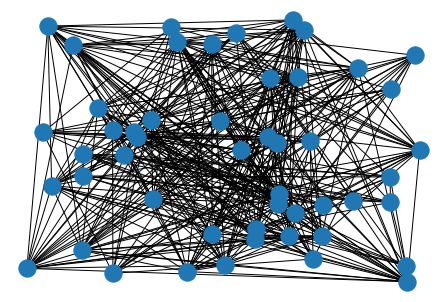

In [73]:
# link prediction

# remove edges from SG
sg_edge_subset = random.sample(SG.edges(), int(0.15 * SG.number_of_edges()))

SG_copy = SG.copy()
SG_copy.remove_edges_from(sg_edge_subset)

nx.draw_random(SG_copy)
print(nx.info(SG_copy))

In [100]:
# jaccard co-efficient

prediction_graph_list = list(nx.jaccard_coefficient(SG_copy))
zero = 0
refined_list = [item for item in prediction_graph_list if item[2] != zero]
refined_list

[(0, 3, 1.0),
 (1, 2, 0.6666666666666666),
 (2, 4, 0.625),
 (2, 6, 0.75),
 (2, 8, 0.6666666666666666),
 (4, 6, 0.875),
 (4, 9, 0.7777777777777778),
 (11, 35, 0.6956521739130435),
 (11, 13, 0.8571428571428571),
 (11, 17, 0.8636363636363636),
 (11, 31, 0.8636363636363636),
 (12, 19, 0.782608695652174),
 (12, 20, 0.8260869565217391),
 (13, 33, 0.6521739130434783),
 (13, 17, 0.8181818181818182),
 (13, 30, 0.6956521739130435),
 (13, 31, 0.8181818181818182),
 (14, 19, 0.6956521739130435),
 (14, 23, 0.7727272727272727),
 (14, 27, 0.782608695652174),
 (14, 29, 0.9090909090909091),
 (15, 16, 0.8181818181818182),
 (15, 25, 0.7391304347826086),
 (15, 30, 0.7727272727272727),
 (15, 32, 0.6818181818181818),
 (15, 33, 0.7272727272727273),
 (16, 33, 0.8181818181818182),
 (16, 20, 0.782608695652174),
 (17, 19, 0.7391304347826086),
 (18, 33, 0.6956521739130435),
 (18, 25, 0.8636363636363636),
 (18, 27, 0.782608695652174),
 (18, 28, 0.8636363636363636),
 (19, 35, 0.6521739130434783),
 (19, 24, 0.7826086

In [101]:
# common neighbor centrality
predicition_common_neighbor = list(nx.common_neighbor_centrality(SG_copy))
zero = 0
refined_list_common = [item for item in predicition_common_neighbor if item[2] != zero]
refined_list_common

KeyError: 11